# import libraries #

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.impute import SimpleImputer
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer

import missingno as msno

# load data and explore data #

In [51]:
df = pd.read_csv('healt.csv')

In [52]:
df.head() #display lima data teratas

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [54]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [55]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [57]:
df.describe(include=object).T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


In [58]:
df.duplicated().value_counts() #untuk mengetahui nilai yg duplikat

False    5110
Name: count, dtype: int64

In [59]:
df.drop('id', axis=1, inplace=True)

<Axes: >

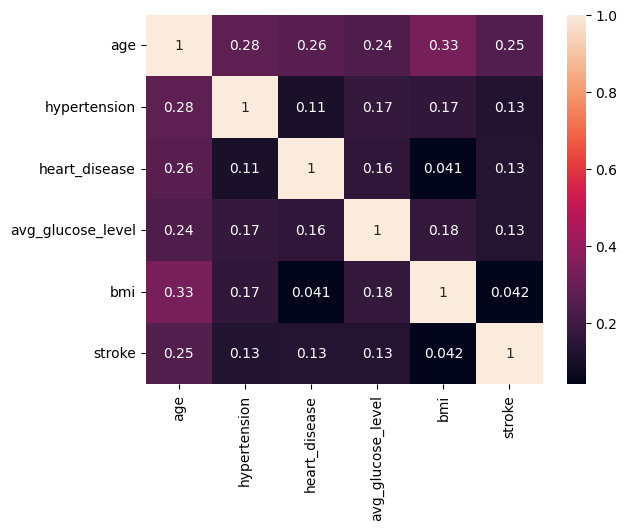

In [60]:
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(), annot=True) #semakin mendakati satu maka semakin kuat

# visualisasi data #

In [61]:
def first_looking(col):
    print("columns name   : ", col)
    print("-------------------------")
    print("per_of_nulls :", "%",
round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls :", df[col].isnull().sum())
    print("num_of_uniques :", df[col].nunique())
    print(df[col].value_counts(dropna = False))


## target analysics

In [62]:
first_looking("stroke")

columns name   :  stroke
-------------------------
per_of_nulls : % 0.0
num_of_nulls : 0
num_of_uniques : 2
stroke
0    4861
1     249
Name: count, dtype: int64


<Axes: ylabel='Frequency'>

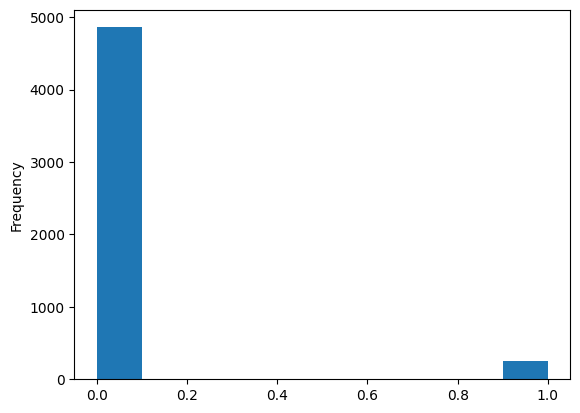

In [63]:
df['stroke'].plot(kind = 'hist') 

didominasikan oleh orang yang tidak stroke

## numerical analysiyc

In [64]:
numerical = df.drop(['stroke'], axis=1).select_dtypes('number').columns
print(f'Numerical Columns: {df[numerical].columns}')

Numerical Columns: Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')


In [65]:
df[numerical].head().T

,0,1,2,3,4
age,67.00,61.00,80.00,49.00,79.00
hypertension,0.00,0.00,0.00,0.00,1.00
heart_disease,1.00,0.00,1.00,0.00,0.00
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.60,NaN,32.50,34.40,24.00


array([<Axes: ylabel='Frequency'>], dtype=object)

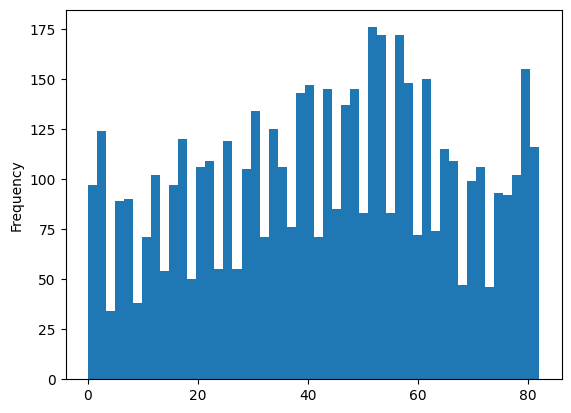

In [66]:
df['age'].plot(kind='hist', subplots=True, bins=50)

array([<Axes: ylabel='Frequency'>], dtype=object)

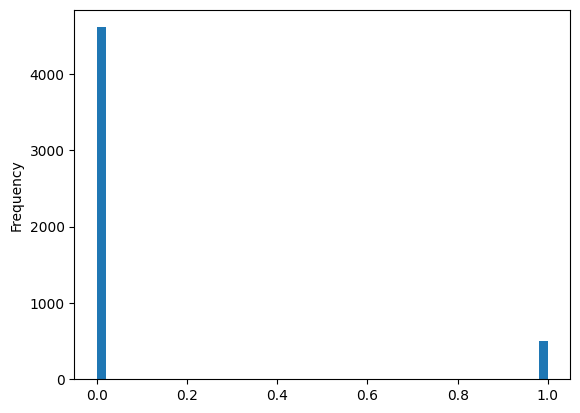

In [67]:
df['hypertension'].plot(kind='hist', subplots=True, bins=50)

array([<Axes: ylabel='Frequency'>], dtype=object)

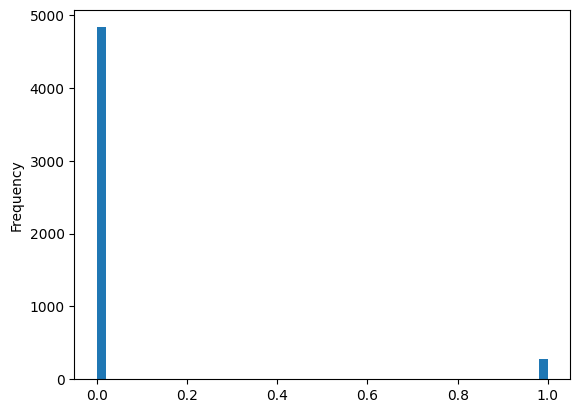

In [68]:
df['heart_disease'].plot(kind='hist', subplots=True, bins=50)

array([<Axes: ylabel='Frequency'>], dtype=object)

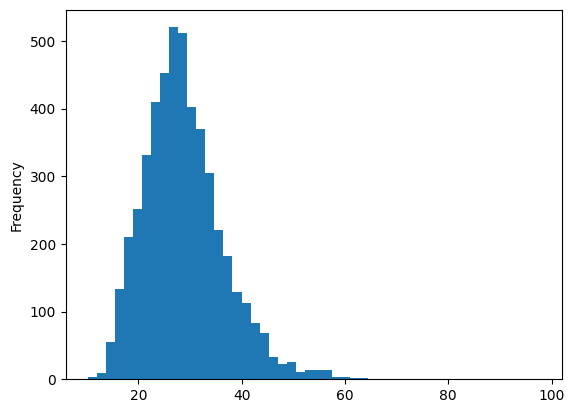

In [69]:
df['bmi'].plot(kind='hist', subplots=True, bins=50)

array([<Axes: ylabel='Frequency'>], dtype=object)

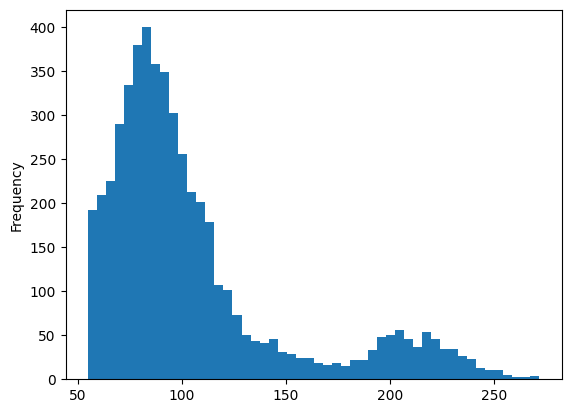

In [70]:
df['avg_glucose_level'].plot(kind='hist', subplots=True, bins=50)

## categorikal analysics

In [71]:
categorical = df.select_dtypes('object').columns

In [72]:
print(f'Categorical Columns : {df[categorical].columns}')

Categorical Columns : Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [73]:
df[categorical].head().T

,0,1,2,3,4
gender,Male,Female,Male,Female,Female
ever_married,Yes,Yes,Yes,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed
Residence_type,Urban,Rural,Rural,Urban,Rural
smoking_status,formerly smoked,never smoked,never smoked,smokes,never smoked


In [74]:
first_looking("gender")

columns name   :  gender
-------------------------
per_of_nulls : % 0.0
num_of_nulls : 0
num_of_uniques : 3
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


In [75]:
df.drop(df[df['gender'] == 'Other'].index, inplace= True)

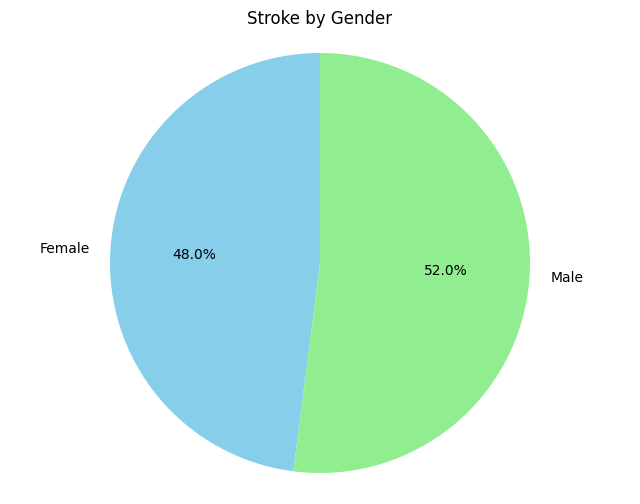

In [76]:
import matplotlib.pyplot as plt

# Menghitung rata-rata stroke berdasarkan gender
stroke_by_gender = df.groupby('gender')['stroke'].mean()

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    stroke_by_gender.values, 
    labels=stroke_by_gender.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['skyblue', 'lightgreen', 'salmon']
)
plt.title('Stroke by Gender')
plt.axis('equal')  # Membuat pie chart menjadi lingkaran sempurna
plt.show()

dari gambar diatas dapat disimpulkan bahwa laki laki lebih rentan terkena stroke daripada perempuan

In [77]:
import cufflinks as cf
cf.go_offline() #Mengaktifkan mode offline untuk Plotly
cf.set_config_file(world_readable=True, theme='pearl') #Mengatur konflik

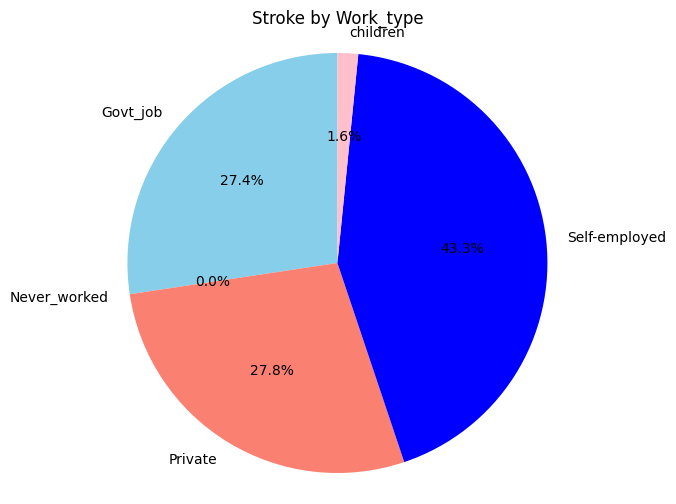

In [78]:
stroke_by_work_type = df.groupby('work_type')['stroke'].mean()

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    stroke_by_work_type.values, 
    labels=stroke_by_work_type.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['skyblue', 'lightgreen', 'salmon', 'blue', 'pink']
)
plt.title('Stroke by Work_type')
plt.axis('equal')  # Membuat pie chart menjadi lingkaran sempurna
plt.show()

stroke lebih sering menyerang self-employed dan govt_job(seperti pns)

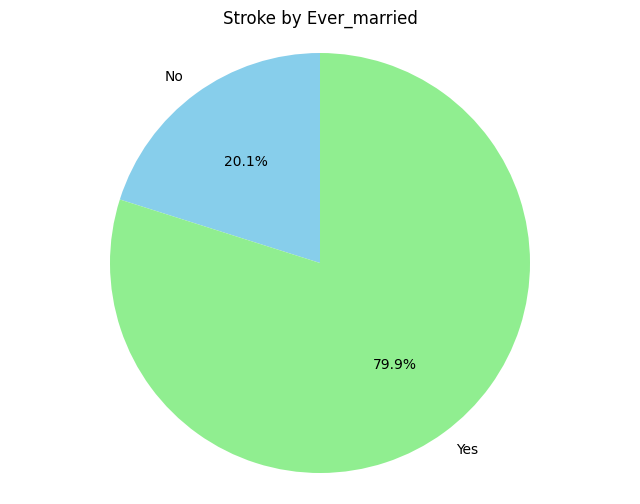

In [79]:
stroke_by_ever_married = df.groupby('ever_married')['stroke'].mean()

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    stroke_by_ever_married.values, 
    labels=stroke_by_ever_married.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['skyblue', 'lightgreen', 'salmon']
)
plt.title('Stroke by Ever_married')
plt.axis('equal')  # Membuat pie chart menjadi lingkaran sempurna
plt.show()

stroke juga bisa di akibatkan oleh pernikahan dari orang orang yang sudah menikah sebanyak 79.9 persen

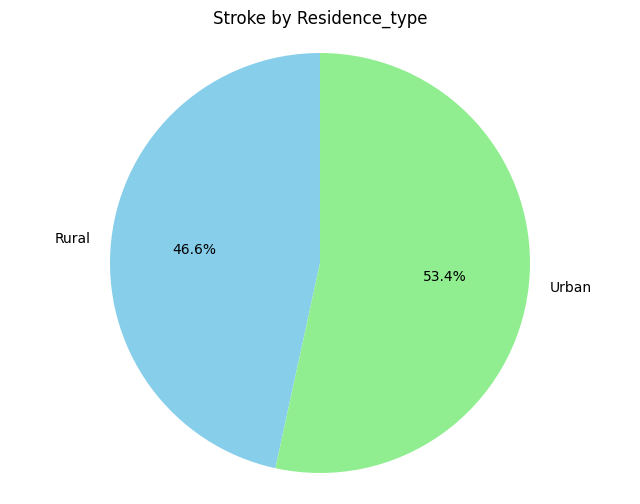

In [80]:
stroke_by_Residence_type = df.groupby('Residence_type')['stroke'].mean()

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    stroke_by_Residence_type.values, 
    labels=stroke_by_Residence_type.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['skyblue', 'lightgreen', 'salmon']
)
plt.title('Stroke by Residence_type')
plt.axis('equal')  # Membuat pie chart menjadi lingkaran sempurna
plt.show()

dari data diatas diketahui bahwa penyebab stroke bisa diakibatkan oleh rural(askot dari perdesaan) lebih sedikit daripada urban(perkotaan) 

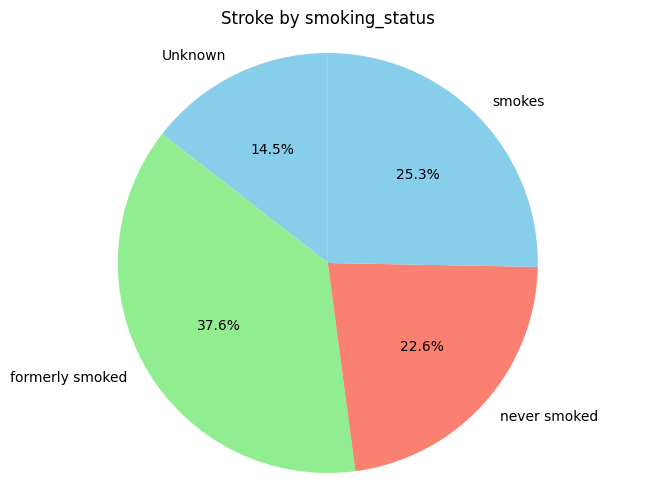

In [81]:
stroke_by_smoking_status = df.groupby('smoking_status')['stroke'].mean()

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    stroke_by_smoking_status.values, 
    labels=stroke_by_smoking_status.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['skyblue', 'lightgreen', 'salmon']
)
plt.title('Stroke by smoking_status')
plt.axis('equal')  # Membuat pie chart menjadi lingkaran sempurna
plt.show()

dari gambar diatas  dapat diketahui bahwa stroke bisa disebabkan oleh roko dengan presentase 25.3 dan yang tidak meroko dengan presentase 22.6 sisanya adalah formerly smoked dan unkown

In [82]:
#df = pd.get_dummies(df, columns=['gender_Male', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True) 

In [83]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [85]:
df = pd.get_dummies(df, columns=['gender', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status',], drop_first=True)

In [86]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,NaN,1,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,True,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,1,False,True,False,False,True,False,False,False,True,False


<Axes: >

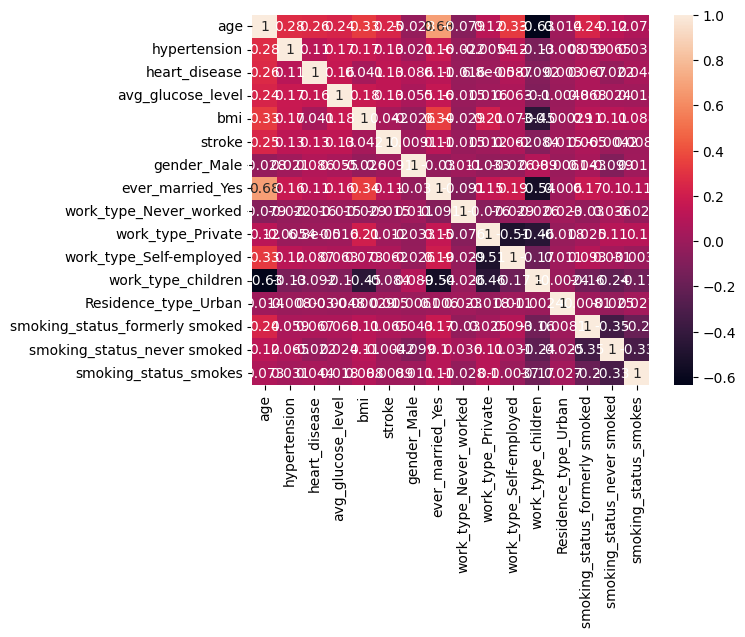

In [88]:
sns.heatmap(df.corr(), annot=True)

yang mendekati angka satu di stroke adalah age, hypertensi dan heart_disease

## data processing

In [95]:
X = df.drop('stroke',axis=1)
y = df['stroke']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [97]:
df.isnull().sum()

age                                 0
hypertension                        0
heart_disease                       0
avg_glucose_level                   0
bmi                               201
stroke                              0
gender_Male                         0
ever_married_Yes                    0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
Residence_type_Urban                0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

In [98]:
imputer = SimpleImputer(missing_values=np.nan, strategy="median")

X_train['bmi'] = imputer.fit_transform(X_train['bmi'].values.reshape(-1,1))[:,0]

In [99]:
X_test['bmi'] = imputer.fit_transform(X_test['bmi'].values.reshape(-1,1))[:,0]

In [100]:
X_train.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender_Male                       0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [101]:
X_test.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender_Male                       0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [103]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## mesin learning

In [105]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [106]:
knn_pred = knn.predict(X_test_scaled)

In [107]:
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[1442    2]
 [  86    3]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.60      0.03      0.06        89

    accuracy                           0.94      1533
   macro avg       0.77      0.52      0.52      1533
weighted avg       0.92      0.94      0.92      1533



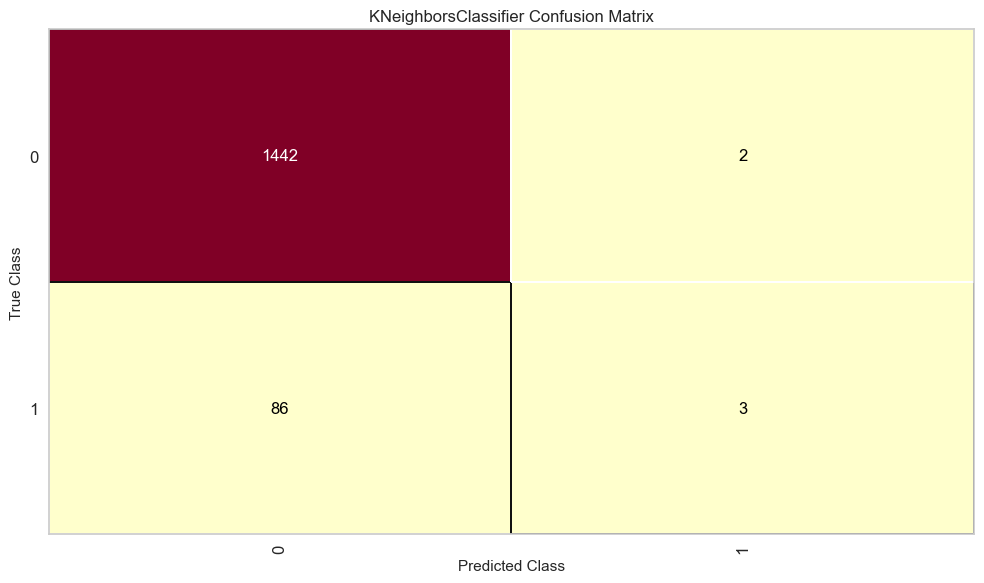

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [108]:
plt.figure(figsize=(10,6))
cm = ConfusionMatrix(knn)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

positiv dan negatif, negatif adalah orang orang yang tidak terkena struk, sebaliknya, yang tidak terkena dianggap 0 dan yang terkena adalah 1

In [109]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.impute import SimpleImputer
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer

import missingno as msno